# Sentiment Analysis On Amazon Reviews

In this notebook, we will perform sentiment analysis in Python using three different techniques:

- VADER (Valence Aware Dictionary and sEntiment Reasoner) - A bag of words approach.
- RoBERTa Pretrained Model.
- Hugging Face Pipeline.

# Step 0. Read in Data and NLTK Basics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

KeyboardInterrupt: 

In [14]:
# Read in data
import pandas as pd

df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [15]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## EDA

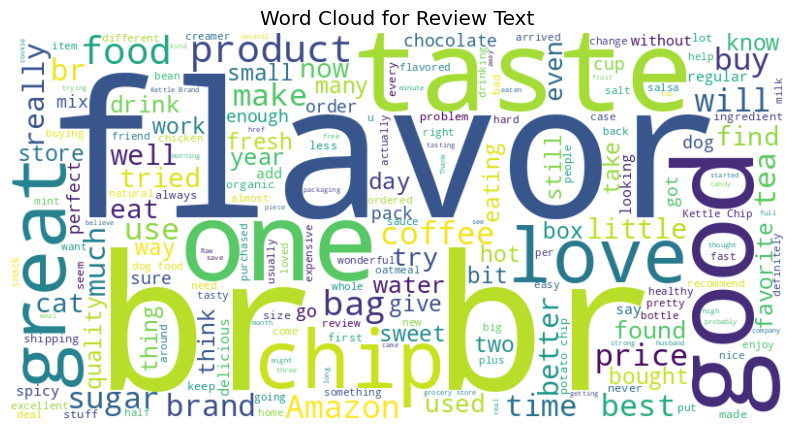

In [23]:
from wordcloud import WordCloud


text = ' '.join(df['Text'].dropna())  # Concatenate all review text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Text')
plt.show()


<ipython-input-30-7a5920d11409>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='viridis')


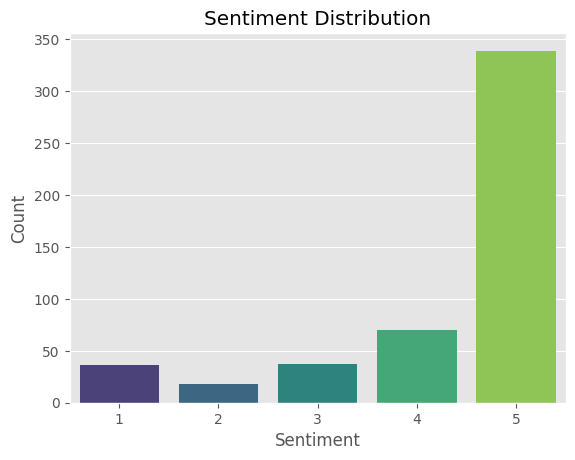

In [30]:
sns.countplot(x='Score', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [28]:
sns.countplot(x='Score', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


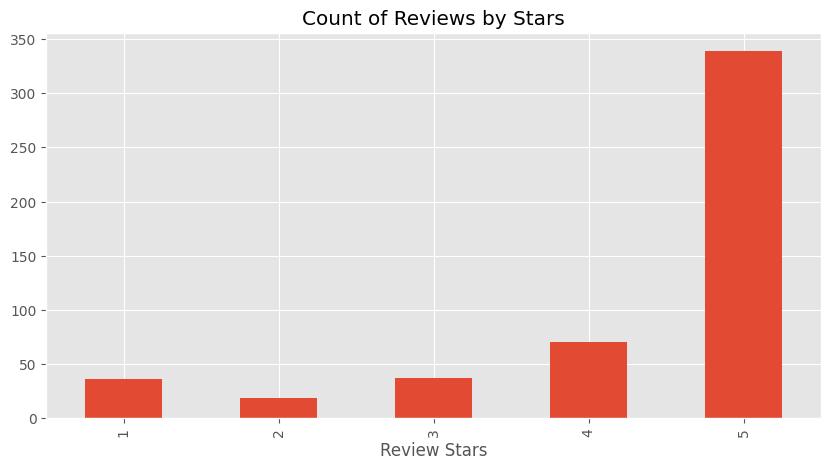

In [24]:
#OR:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
                                                   title='Count of Reviews by Stars',
                                                   figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()



<ipython-input-34-4558e1a65073>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


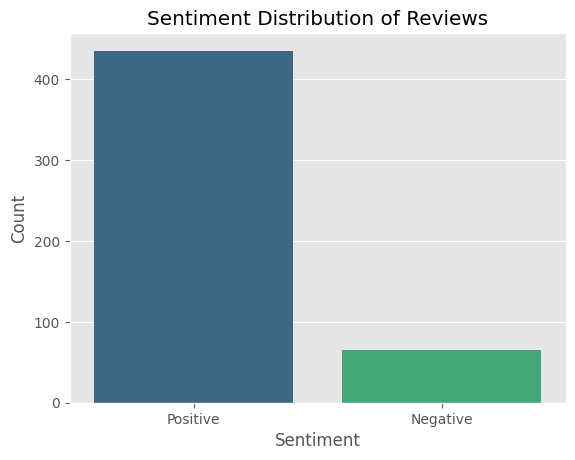

In [34]:
from textblob import TextBlob

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



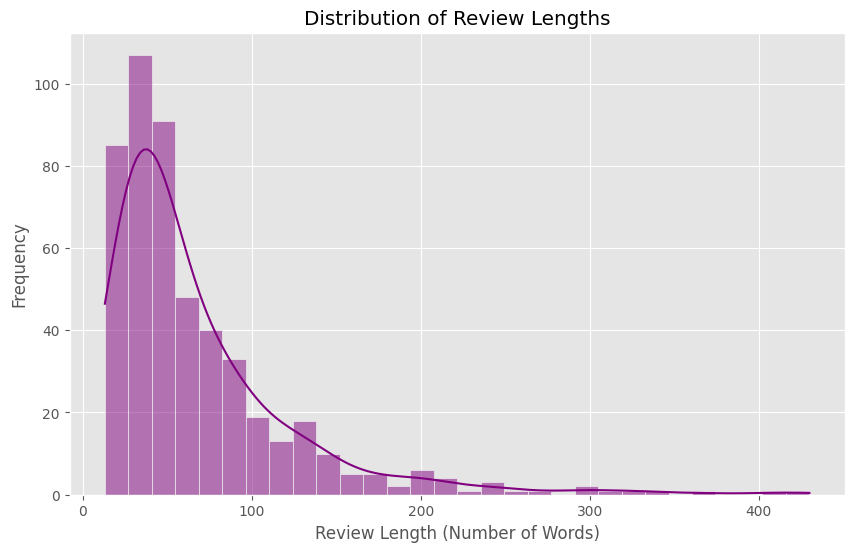

In [20]:
df.columns
# 2. Distribution of Review Length (Word Count or Character Count)
df['Review Length'] = df['Text'].apply(lambda x: len(str(x).split()))  # Word count
plt.figure(figsize=(10, 6))
sns.histplot(df['Review Length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

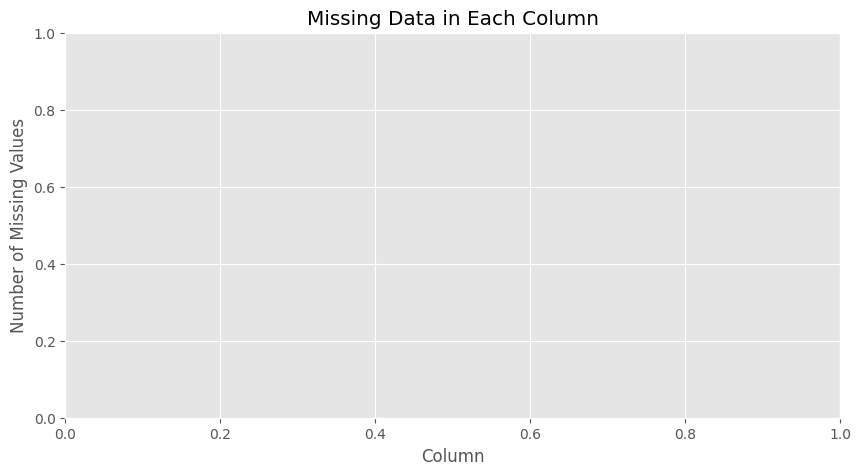

In [35]:
# 5. Check for Missing Data
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')
plt.title('Missing Data in Each Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.show()


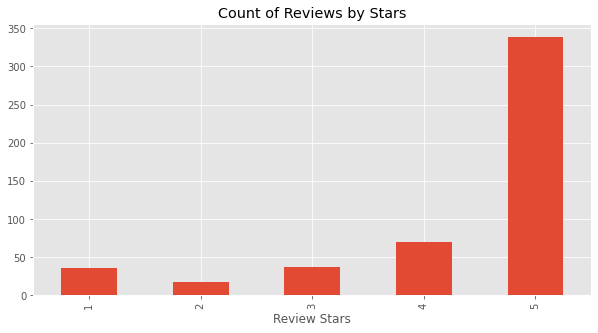

In [ ]:
bax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [38]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [40]:
import nltk
nltk.download('punkt_tab')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [42]:
nltk.download('averaged_perceptron_tagger_eng')

tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [46]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)

entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [49]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [51]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [52]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [53]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [54]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [56]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review Length,Sentiment
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,48,Positive
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,Negative
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,94,Positive
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,41,Positive
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,27,Positive


## Plot VADER results

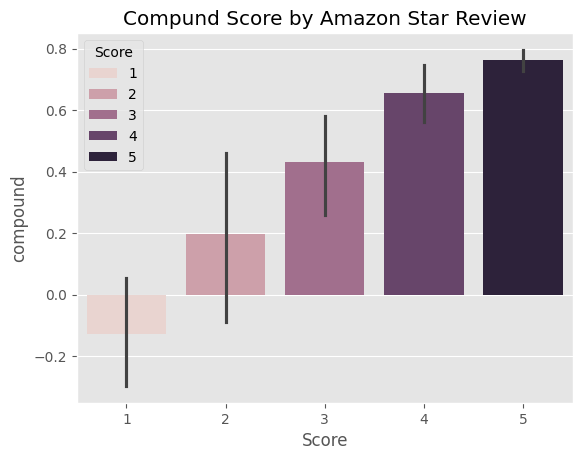

In [58]:
ax = sns.barplot(data=vaders, x='Score', y='compound',hue="Score")
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

<ipython-input-90-9452894b4f3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], palette='Blues')  # Positive bars in blue shades
<ipython-input-90-9452894b4f3e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], palette='Greens')  # Neutral bars in green shades
<ipython-input-90-9452894b4f3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], palette='Reds')   # Negative bars in red shades


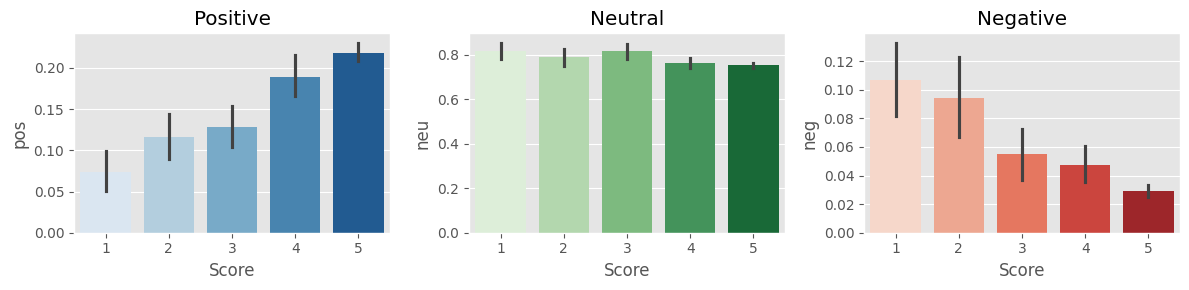

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Bar plots with custom colors
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], palette='Blues')  # Positive bars in blue shades
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], palette='Greens')  # Neutral bars in green shades
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], palette='Reds')   # Negative bars in red shades

# Set titles for each subplot
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [60]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [61]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [62]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [63]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687465, 'roberta_pos': 0.0029573706}


In [64]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [66]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [67]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [68]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'Review Length', 'Sentiment'],
      dtype='object')

# Step 3. Combine and compare

['o', 's', 'D', 'P', '^']


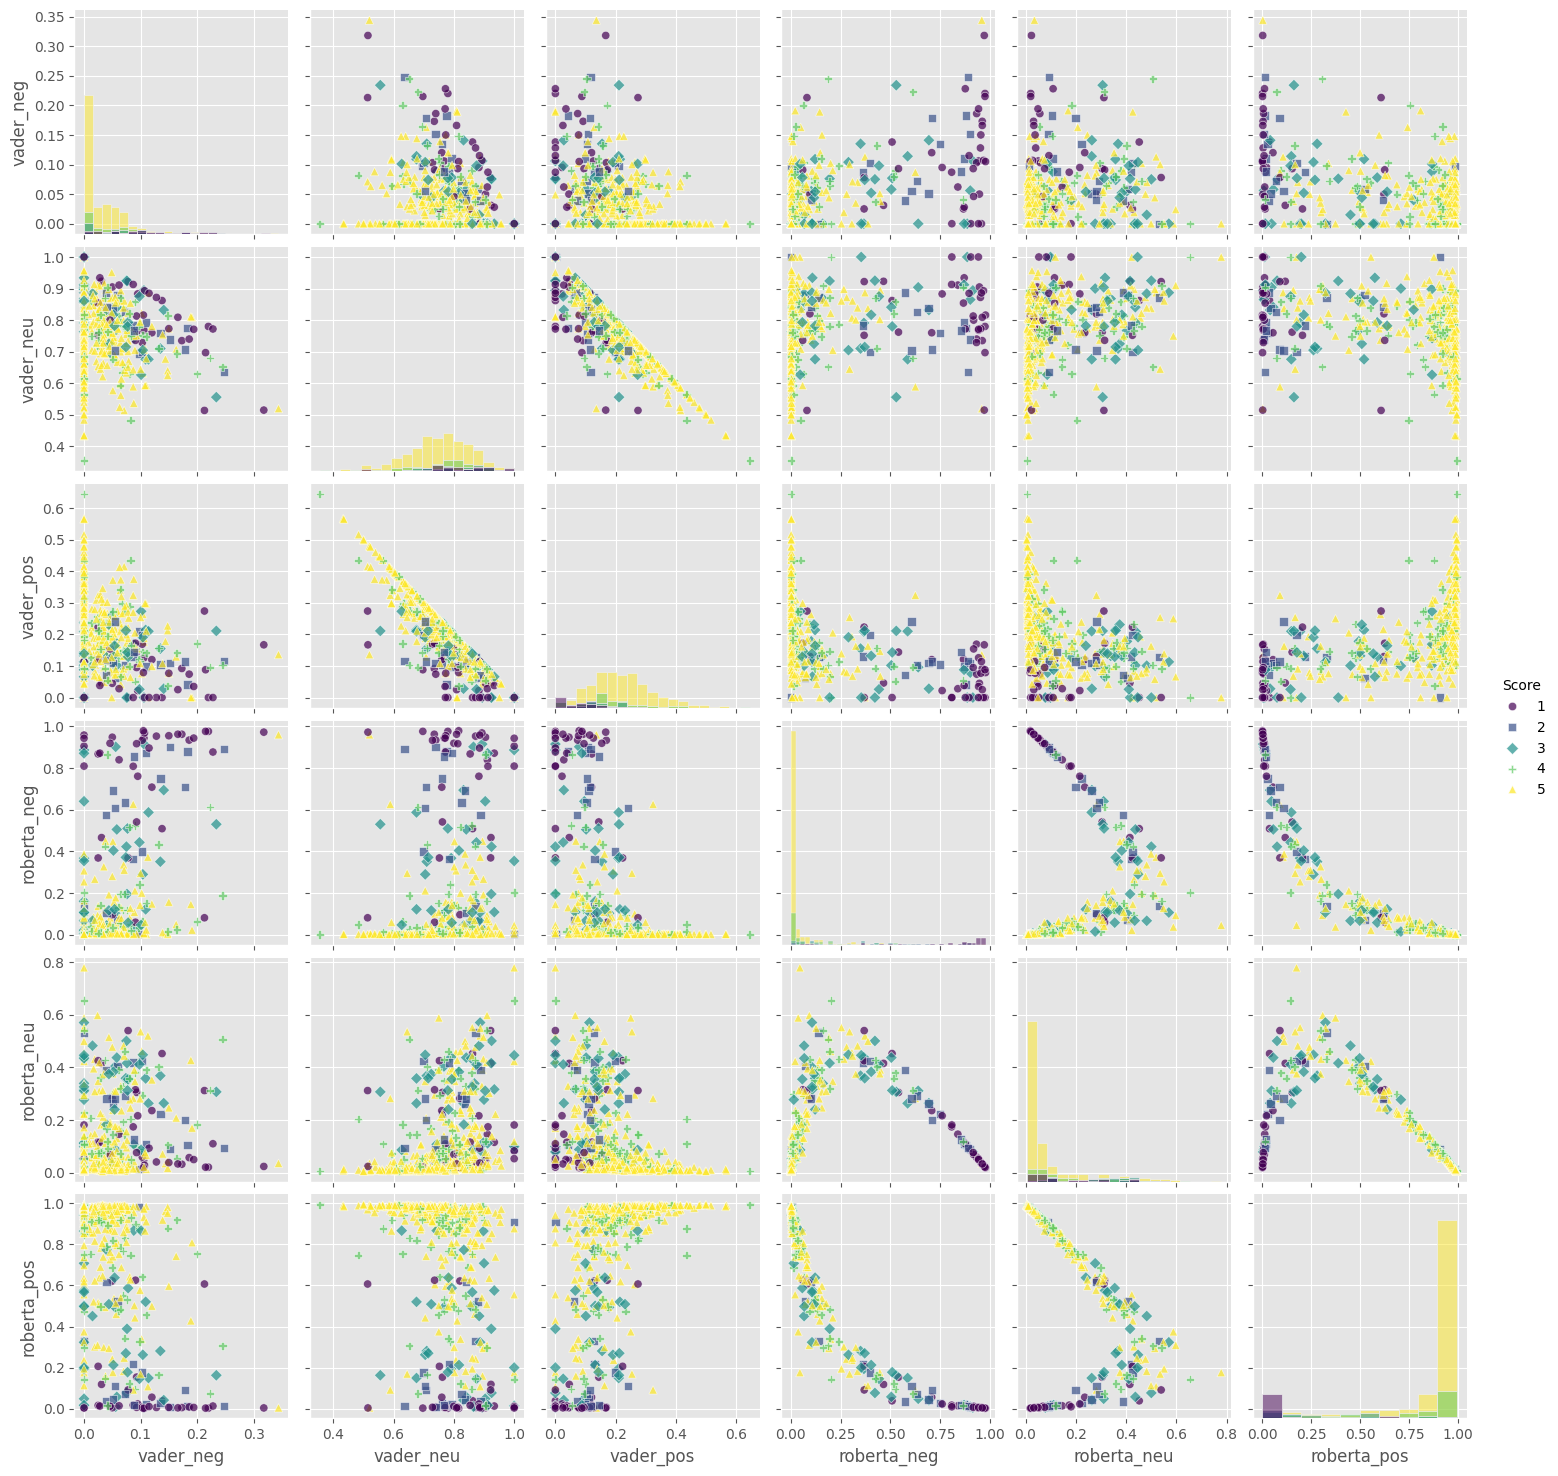

In [98]:

markers_list = ['o', 's', 'D', 'P', '^']

sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='viridis',
             markers=markers_list,
             height=2.5,
             diag_kind='hist',
             plot_kws={'alpha': 0.7})
print(markers_list)
plt.show()


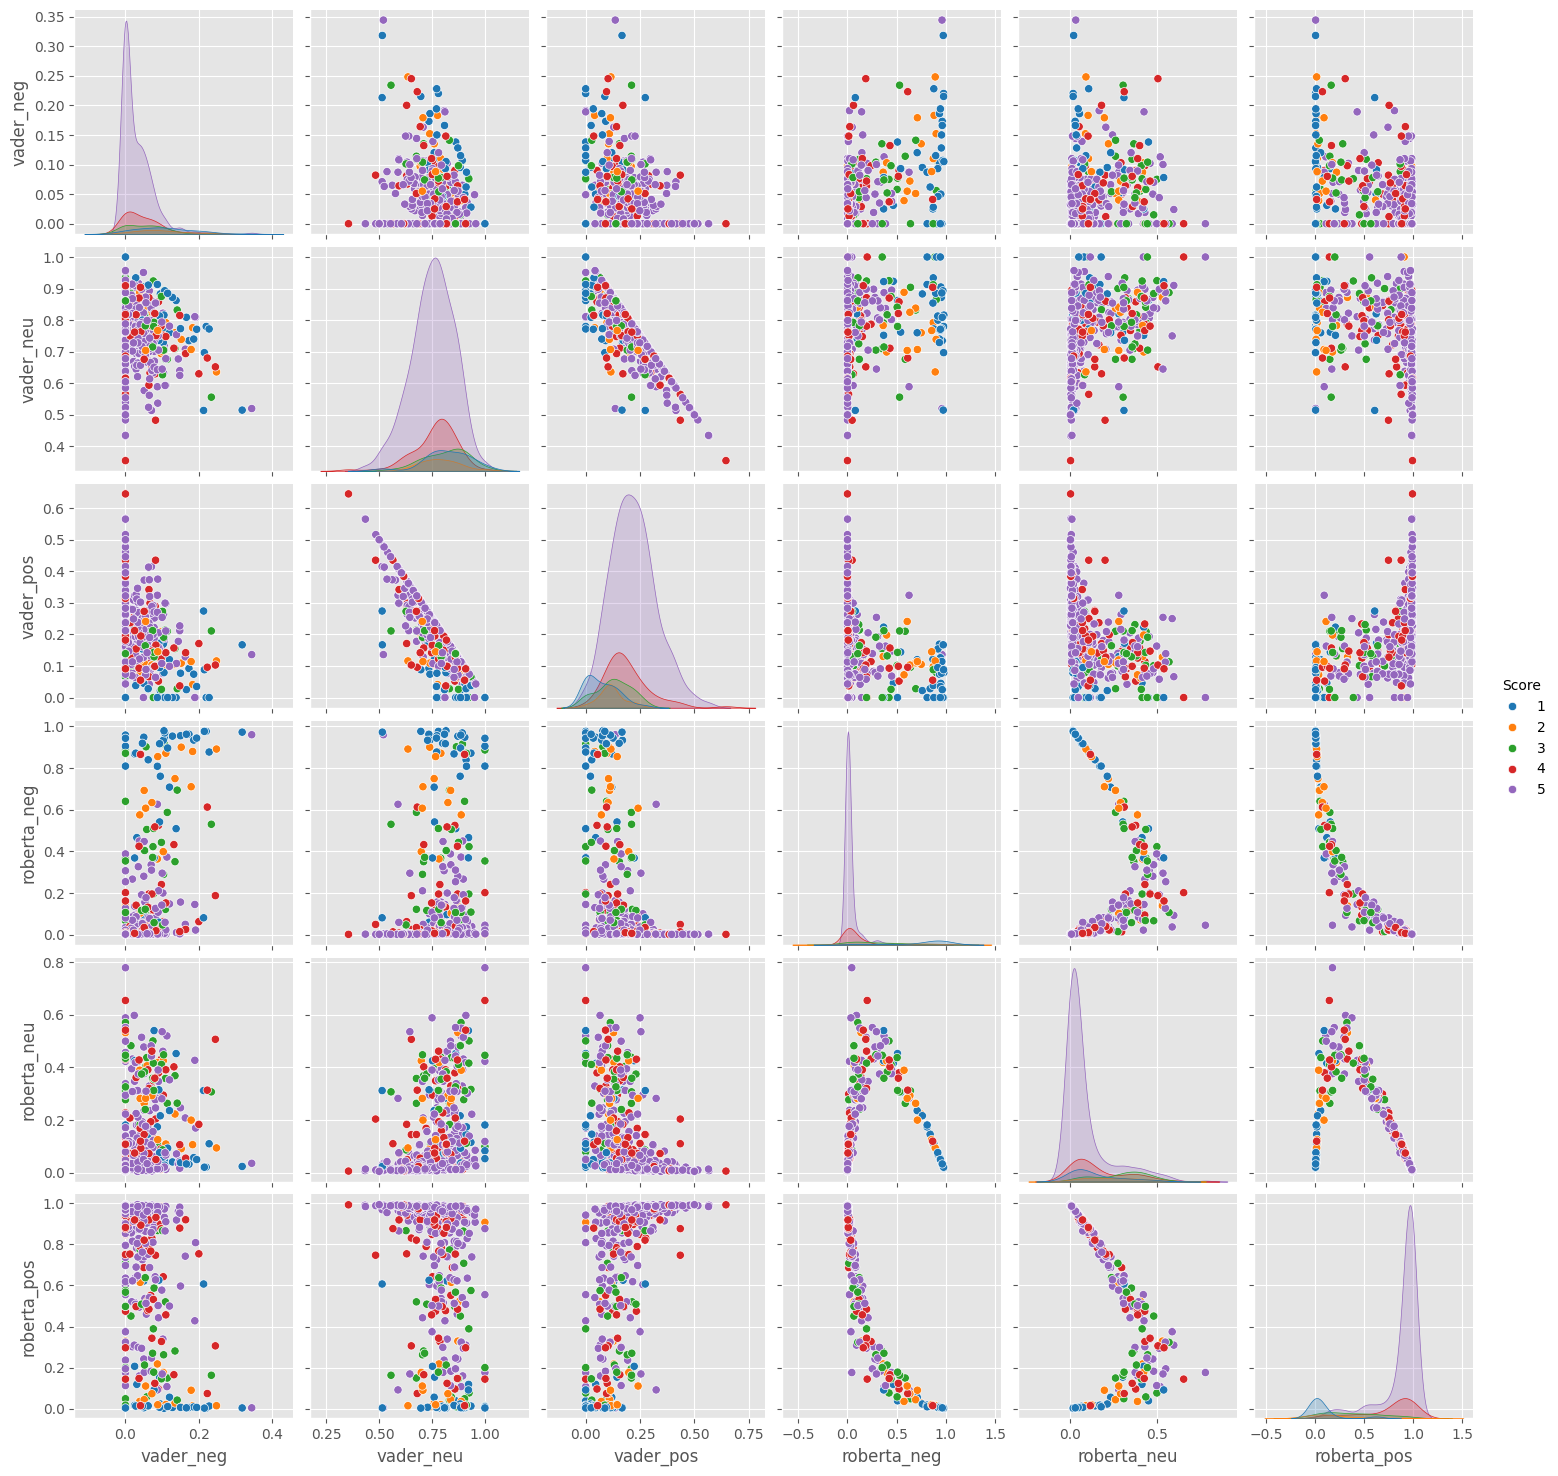

In [92]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()




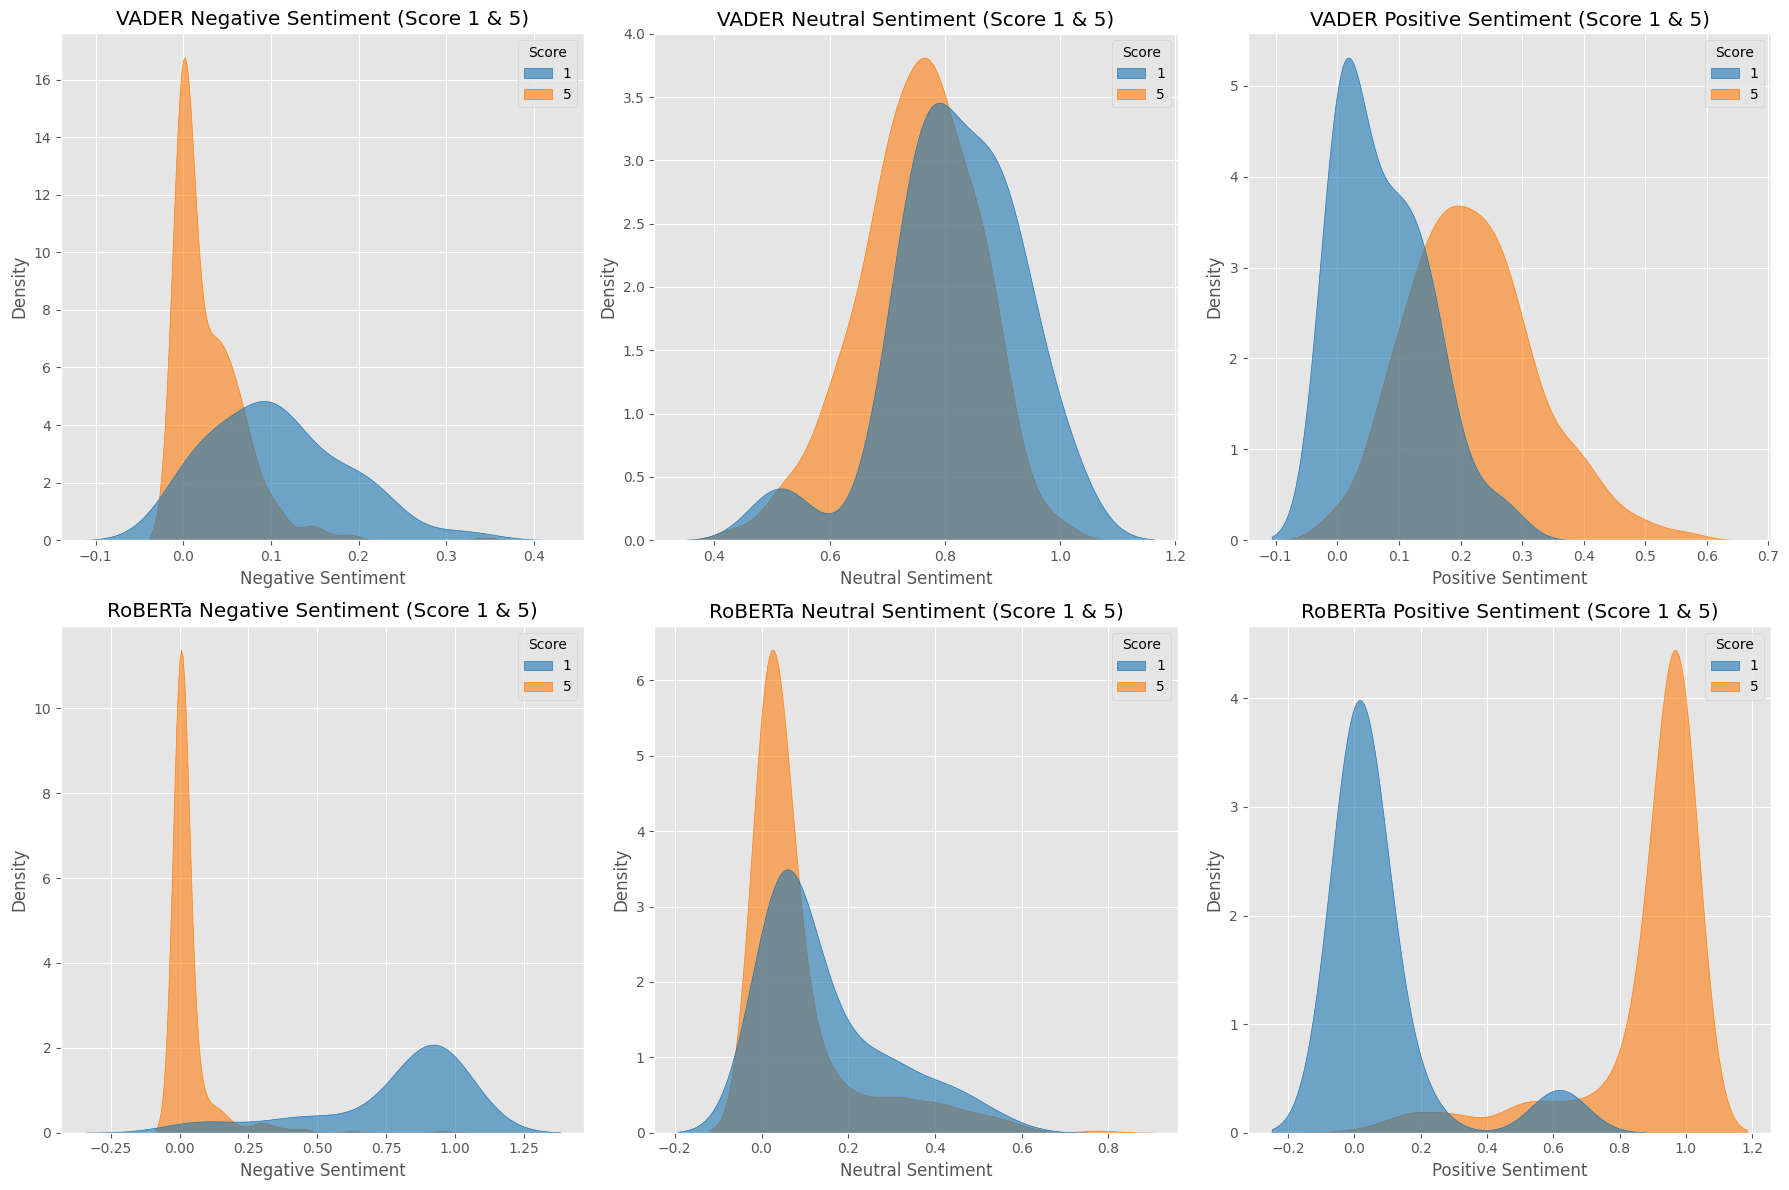

In [109]:
filtered_df = results_df[results_df['Score'].isin([1, 5])]

# Create a 2x3 grid of subplots for each sentiment category (vader_neg, vader_neu, vader_pos) for VADER
plt.figure(figsize=(18, 12))

# VADER Plots
plt.subplot(2, 3, 1)
sns.kdeplot(data=filtered_df, x='vader_neg', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
plt.title("VADER Negative Sentiment (Score 1 & 5)")
plt.xlabel('Negative Sentiment')
plt.ylabel('Density')

plt.subplot(2, 3, 2)
sns.kdeplot(data=filtered_df, x='vader_neu', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
plt.title("VADER Neutral Sentiment (Score 1 & 5)")
plt.xlabel('Neutral Sentiment')
plt.ylabel('Density')

plt.subplot(2, 3, 3)
sns.kdeplot(data=filtered_df, x='vader_pos', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
plt.title("VADER Positive Sentiment (Score 1 & 5)")
plt.xlabel('Positive Sentiment')
plt.ylabel('Density')

# Create a 2x3 grid of subplots for each sentiment category (roberta_neg, roberta_neu, roberta_pos) for RoBERTa
plt.subplot(2, 3, 4)
sns.kdeplot(data=filtered_df, x='roberta_neg', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
plt.title("RoBERTa Negative Sentiment (Score 1 & 5)")
plt.xlabel('Negative Sentiment')
plt.ylabel('Density')

plt.subplot(2, 3, 5)
sns.kdeplot(data=filtered_df, x='roberta_neu', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
plt.title("RoBERTa Neutral Sentiment (Score 1 & 5)")
plt.xlabel('Neutral Sentiment')
plt.ylabel('Density')

plt.subplot(2, 3, 6)
sns.kdeplot(data=filtered_df, x='roberta_pos', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
plt.title("RoBERTa Positive Sentiment (Score 1 & 5)")
plt.xlabel('Positive Sentiment')
plt.ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


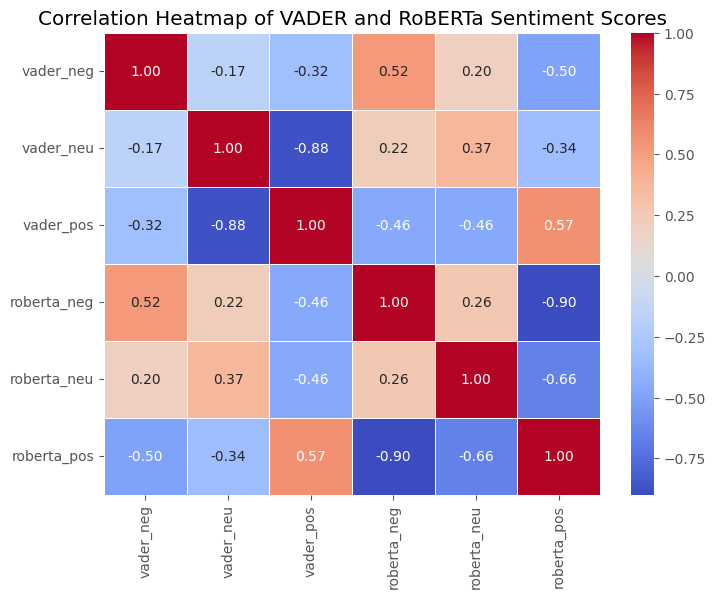

In [75]:
corr = results_df[['vader_neg', 'vader_neu', 'vader_pos',
\               'roberta_neg', 'roberta_neu', 'roberta_pos']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of VADER and RoBERTa Sentiment Scores")
plt.show()


<ipython-input-76-bf7af34a9db6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Score', y='vader_neg', data=results_df, palette='tab10')
<ipython-input-76-bf7af34a9db6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Score', y='vader_neu', data=results_df, palette='tab10')
<ipython-input-76-bf7af34a9db6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Score', y='vader_pos', data=results_df, palette='tab10')
<ipython-input-76-bf7af34a9db6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

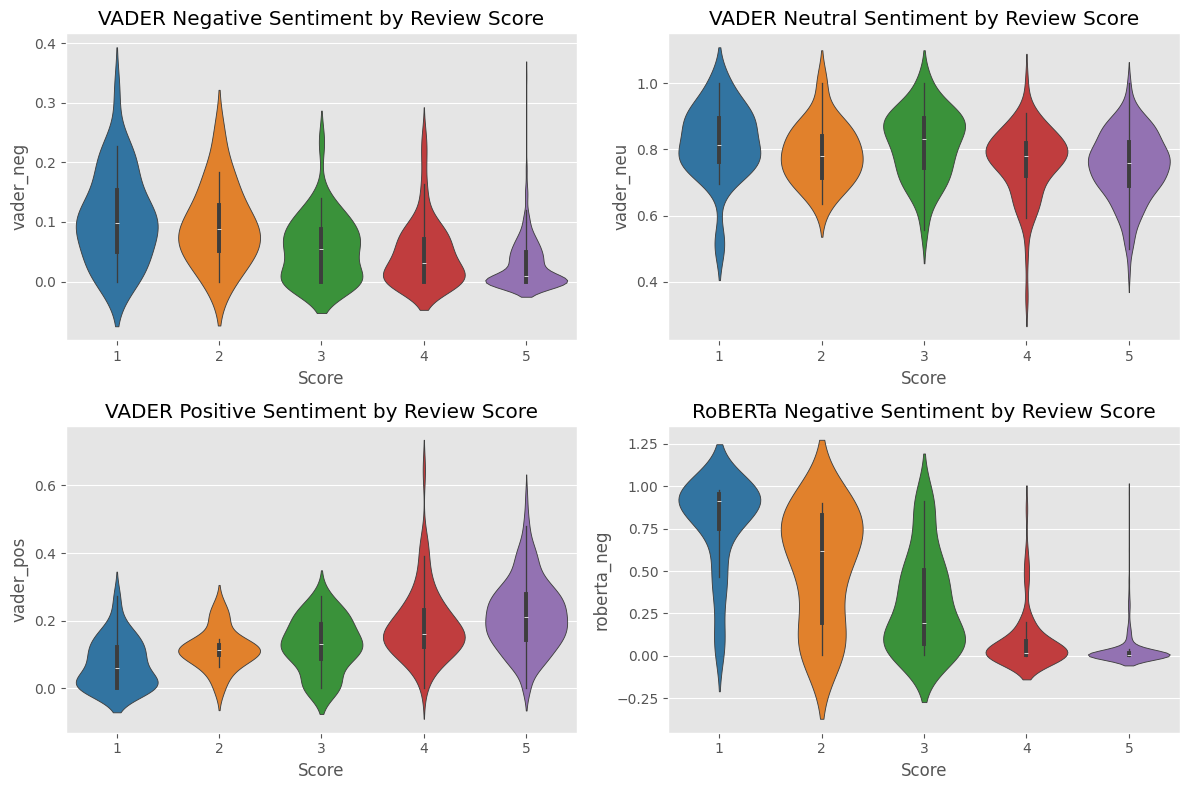

In [76]:
# 3. Violin Plot to Show Distribution of Sentiment Scores for Different Review Scores
plt.figure(figsize=(12, 8))

# VADER sentiment
plt.subplot(2, 2, 1)
sns.violinplot(x='Score', y='vader_neg', data=results_df, palette='tab10')
plt.title('VADER Negative Sentiment by Review Score')

plt.subplot(2, 2, 2)
sns.violinplot(x='Score', y='vader_neu', data=results_df, palette='tab10')
plt.title('VADER Neutral Sentiment by Review Score')

plt.subplot(2, 2, 3)
sns.violinplot(x='Score', y='vader_pos', data=results_df, palette='tab10')
plt.title('VADER Positive Sentiment by Review Score')

# RoBERTa sentiment
plt.subplot(2, 2, 4)
sns.violinplot(x='Score', y='roberta_neg', data=results_df, palette='tab10')
plt.title('RoBERTa Negative Sentiment by Review Score')

plt.tight_layout()
plt.show()


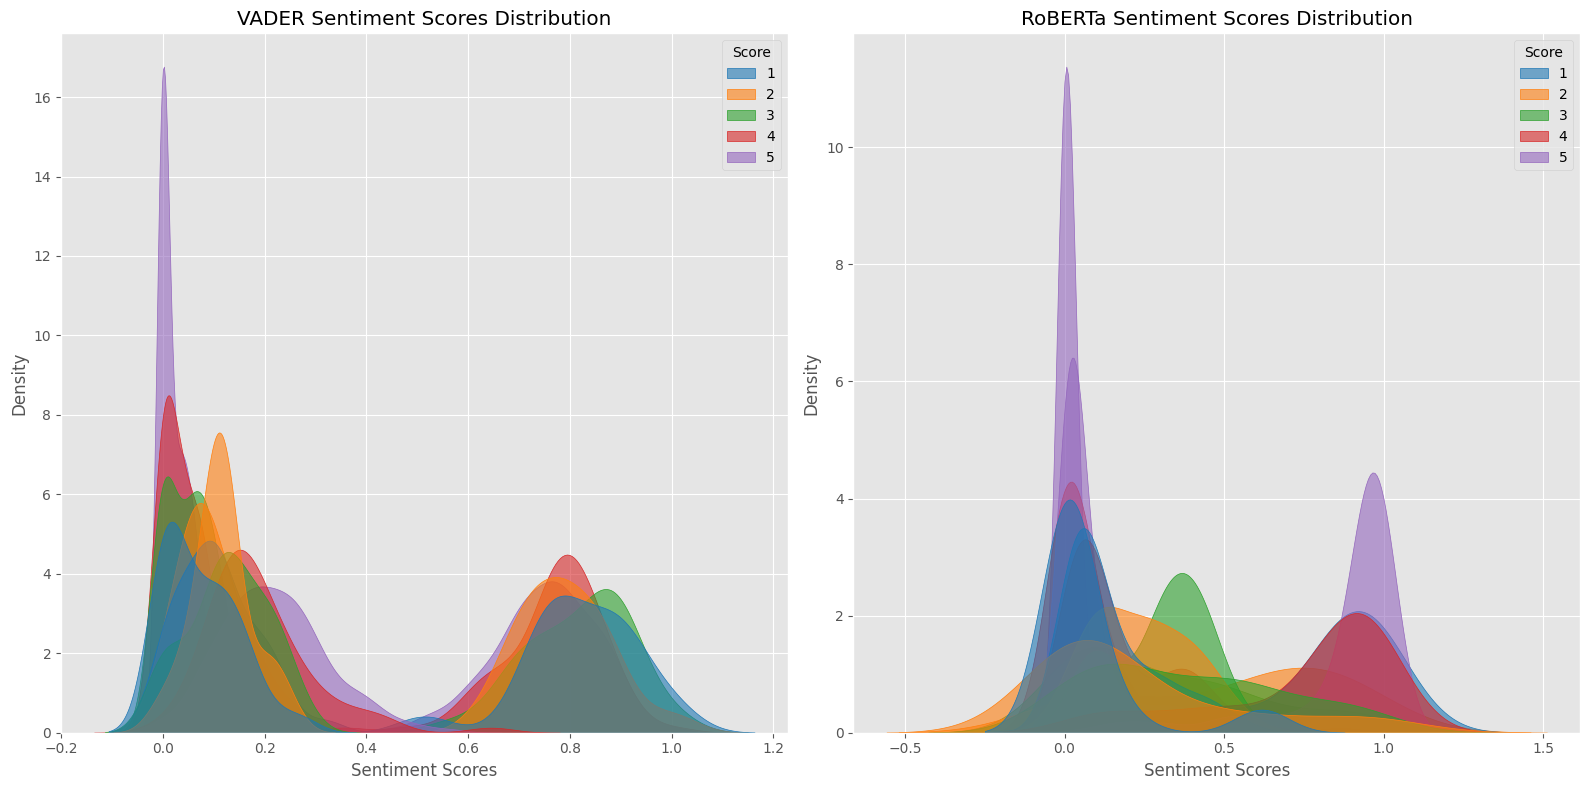

In [80]:
# Create a 1x2 grid of subplots
plt.figure(figsize=(16, 8))

# First subplot for VADER sentiment
plt.subplot(1, 2, 1)  # (rows, cols, index)
sns.kdeplot(data=results_df, x='vader_neg', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
sns.kdeplot(data=results_df, x='vader_neu', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
sns.kdeplot(data=results_df, x='vader_pos', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
plt.title("VADER Sentiment Scores Distribution")
plt.xlabel('Sentiment Scores')
plt.ylabel('Density')

# Second subplot for RoBERTa sentiment
plt.subplot(1, 2, 2)  # (rows, cols, index)
sns.kdeplot(data=results_df, x='roberta_neg', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
sns.kdeplot(data=results_df, x='roberta_neu', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
sns.kdeplot(data=results_df, x='roberta_pos', hue='Score', fill=True, common_norm=False, palette='tab10', alpha=0.6)
plt.title("RoBERTa Sentiment Scores Distribution")
plt.xlabel('Sentiment Scores')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


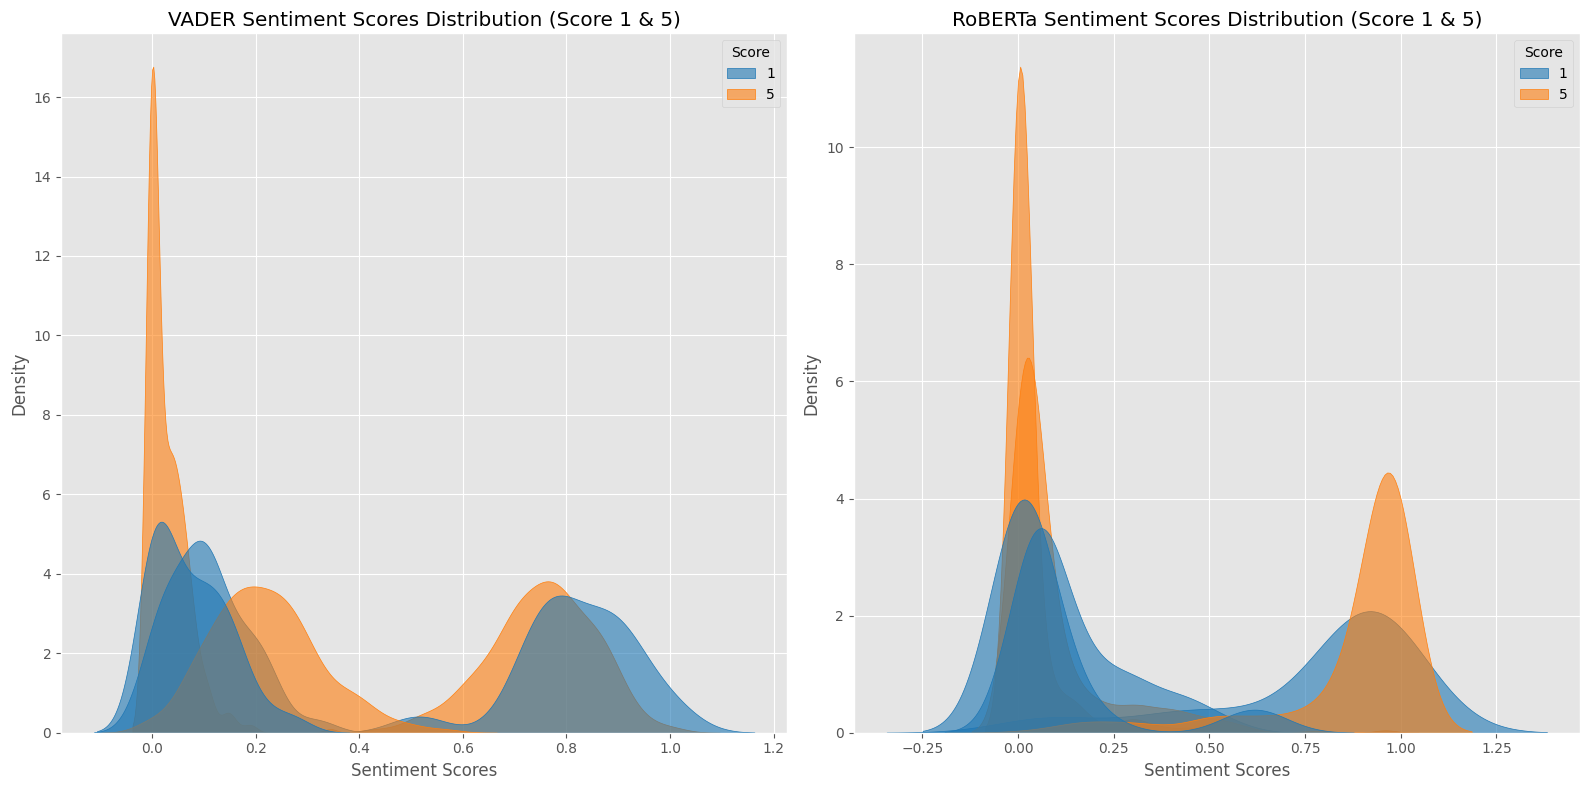

# Accuracy and Classification Report for both VADER and RoBERTa

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER Accuracy: 0.8313253012048193
VADER Classification Report:
               precision    recall  f1-score   support

    negative       0.54      0.46      0.50        54
     neutral       0.25      0.11      0.15        37
    positive       0.88      0.95      0.91       407

    accuracy                           0.83       498
   macro avg       0.56      0.51      0.52       498
weighted avg       0.80      0.83      0.81       498

RoBERTa Accuracy: 0.8554216867469879
RoBERTa Classification Report:
               precision    recall  f1-score   support

    negative       0.66      0.78      0.71        54
     neutral       0.23      0.22      0.22        37
    positive       0.94      0.92      0.93       407

    accuracy                           0.86       498
   macro avg       0.61      0.64      0.62       498
weighted avg       0.86      0.86      0.86       498



<ipython-input-104-53f140ac4ea9>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_comparison, palette='Blues')


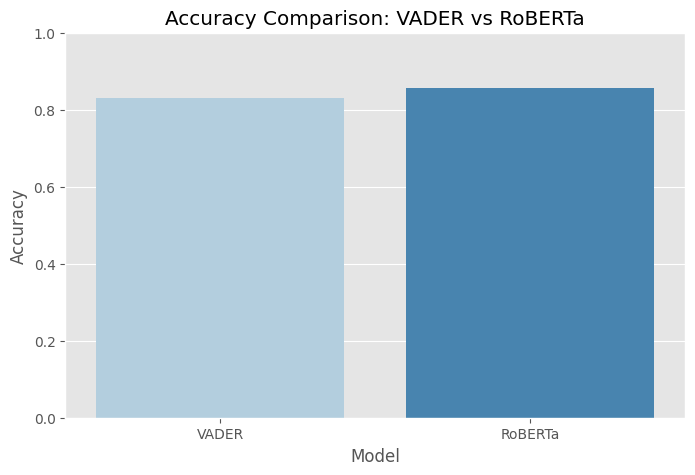

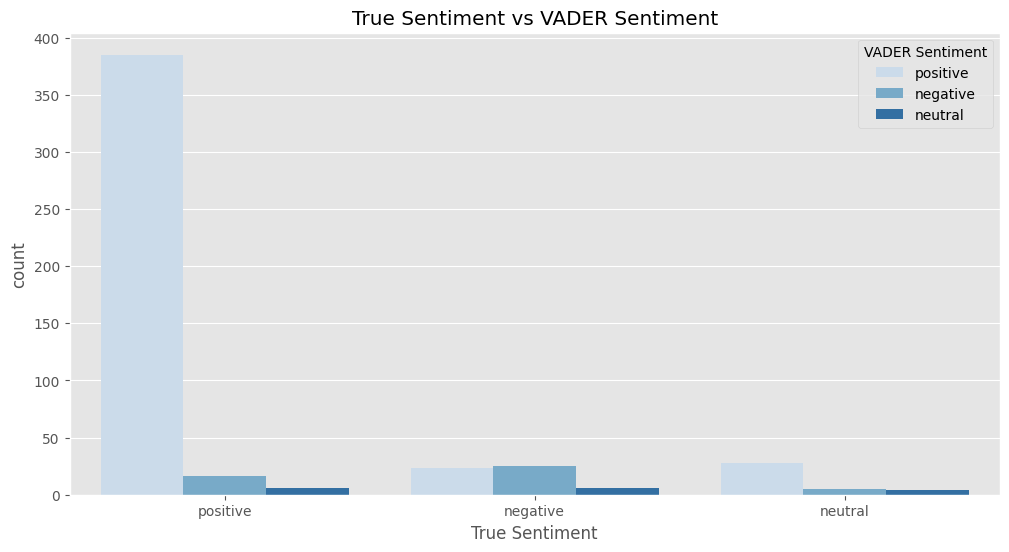

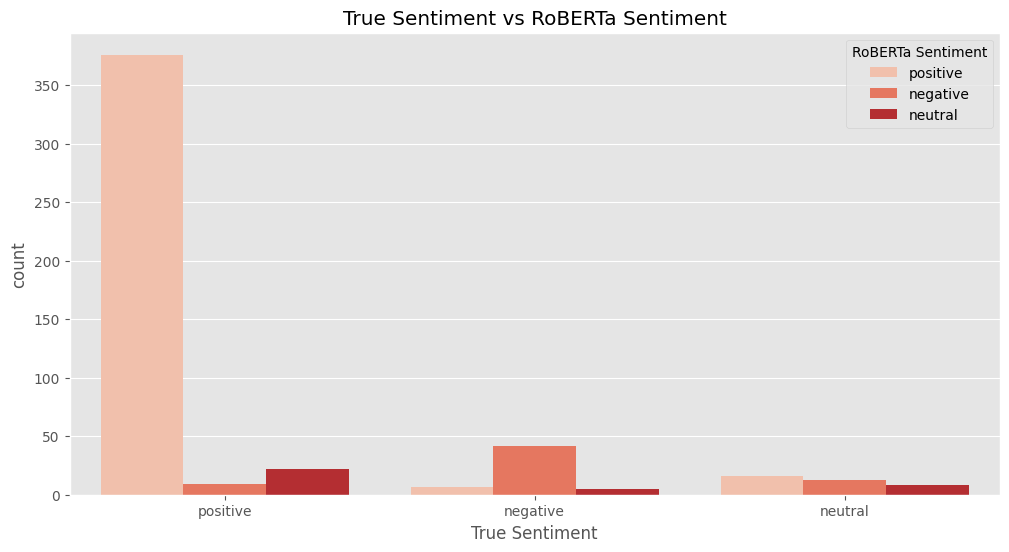

In [104]:
# Initialize VADER SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# 1. Map True Review Score to Sentiment
def map_true_score_to_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

results_df['true_sentiment'] = results_df['Score'].apply(map_true_score_to_sentiment)

# 2. Get VADER Sentiment Prediction
def get_vader_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] <= -0.05:
        return 'negative'
    elif scores['compound'] >= 0.05:
        return 'positive'
    else:
        return 'neutral'

results_df['vader_sentiment'] = results_df['Text'].apply(get_vader_sentiment)

# 3. Get RoBERTa Sentiment Prediction
def get_roberta_sentiment(row):
    if row['roberta_neg'] > max(row['roberta_neu'], row['roberta_pos']):
        return 'negative'
    elif row['roberta_pos'] > max(row['roberta_neg'], row['roberta_neu']):
        return 'positive'
    else:
        return 'neutral'

results_df['roberta_sentiment'] = results_df.apply(get_roberta_sentiment, axis=1)

# 4. Calculate Accuracy and Classification Report for both VADER and RoBERTa
# VADER vs True Review
vader_accuracy = accuracy_score(results_df['true_sentiment'], results_df['vader_sentiment'])
vader_classification = classification_report(results_df['true_sentiment'], results_df['vader_sentiment'])

# RoBERTa vs True Review
roberta_accuracy = accuracy_score(results_df['true_sentiment'], results_df['roberta_sentiment'])
roberta_classification = classification_report(results_df['true_sentiment'], results_df['roberta_sentiment'])

# Print Accuracy and Classification Reports
print("VADER Accuracy:", vader_accuracy)
print("VADER Classification Report:\n", vader_classification)
print("RoBERTa Accuracy:", roberta_accuracy)
print("RoBERTa Classification Report:\n", roberta_classification)

# 5. Visualize the Comparison of Accuracy Between VADER and RoBERTa
accuracy_comparison = pd.DataFrame({
    'Model': ['VADER', 'RoBERTa'],
    'Accuracy': [vader_accuracy, roberta_accuracy]
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_comparison, palette='Blues')
plt.title('Accuracy Comparison: VADER vs RoBERTa')
plt.ylim(0, 1)
plt.show()

# 6. Visualize Sentiment Distribution for Both Models vs True Review Sentiment
# Create a DataFrame for the sentiment distribution comparison
sentiment_comparison_df = pd.DataFrame({
    'True Sentiment': results_df['true_sentiment'],
    'VADER Sentiment': results_df['vader_sentiment'],
    'RoBERTa Sentiment': results_df['roberta_sentiment']
})

# Plot the sentiment distributions for True Review, VADER, and RoBERTa
plt.figure(figsize=(12, 6))
sns.countplot(x='True Sentiment', hue='VADER Sentiment', data=sentiment_comparison_df, palette='Blues', dodge=True)
plt.title('True Sentiment vs VADER Sentiment')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='True Sentiment', hue='RoBERTa Sentiment', data=sentiment_comparison_df, palette='Reds', dodge=True)
plt.title('True Sentiment vs RoBERTa Sentiment')
plt.show()


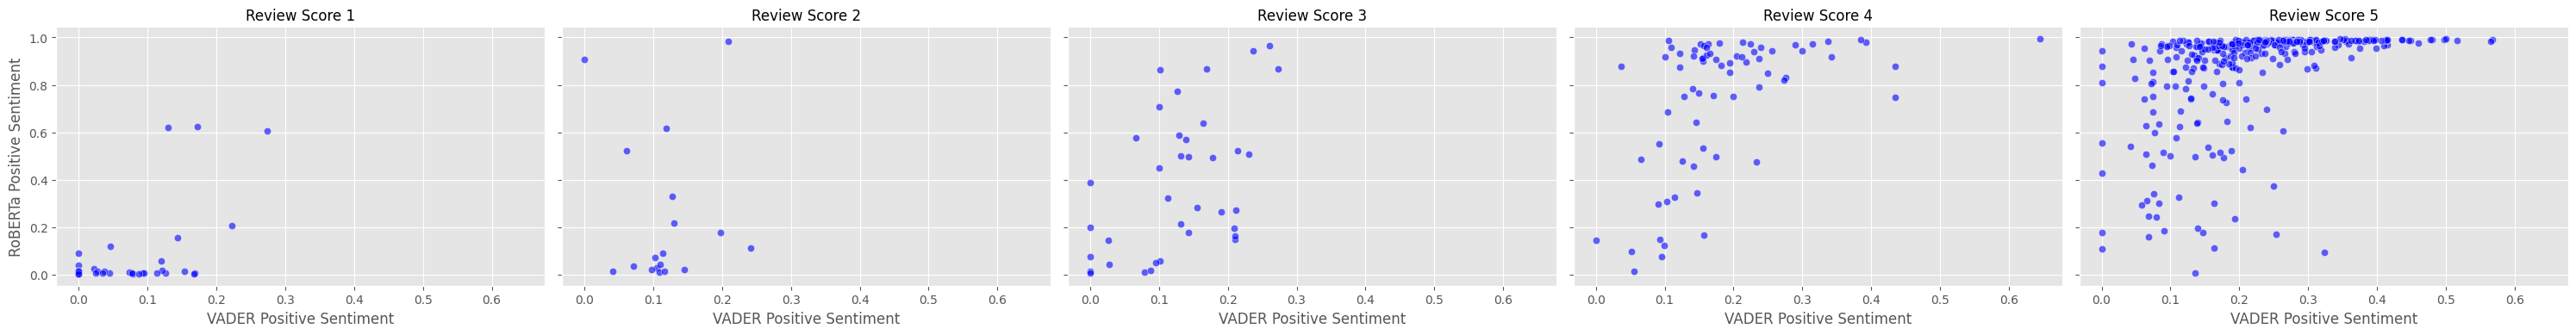

In [105]:
# 5. FacetGrid of Sentiment Scores by Review Score
g = sns.FacetGrid(results_df, col='Score', height=4, aspect=1.5)
g.map(sns.scatterplot, 'vader_pos', 'roberta_pos', alpha=0.6, color='blue')
g.set_axis_labels('VADER Positive Sentiment', 'RoBERTa Positive Sentiment')
g.set_titles('Review Score {col_name}')
plt.show()


# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [70]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [71]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [72]:
# nevative sentiment 5-Star view

In [73]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [74]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [82]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [86]:
sent_pipeline('I hate sentiment analysis!')

[{'label': 'NEGATIVE', 'score': 0.9992958307266235}]

In [87]:
sent_pipeline('It takes much time to do the sentiment analysis')

[{'label': 'NEGATIVE', 'score': 0.9987385869026184}]

In [88]:
sent_pipeline('Hi!')

[{'label': 'POSITIVE', 'score': 0.9989859461784363}]